In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from analysis import bender_class
from config import path_to_repository
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
import seaborn
seaborn.set(font='Arial',context='talk',font_scale=1.0, style='white')

Fig 1E -- min angle for 100% accuracy 

In [7]:
# Specify the curve fit type, 1 for linear, 2 for quadratic.  
degree = 2

# All Samples Tested Below Using Velcro

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized with initial value R₀: 190.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_misalignment_v20_4_22_25.csv']
ADC normalized with initial value R₀: 127.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_misalignment_v10_2nd_attempt_4_22_25.csv']
ADC normalized with initial value R₀: 375.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv']
ADC normalized with initial value R₀: 310.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_misalignment_v10_4_17_25.csv']
ADC normalized with initial value R₀: 570.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2

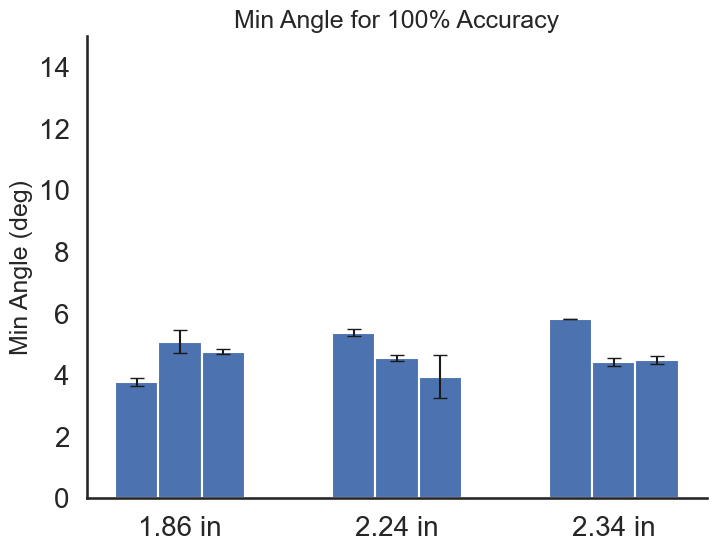

In [9]:
#1.86 reapply sample

DS1_datafiles = os.path.join(path_to_repository , "CSV Data/4_22_25/1.86_static_v1_4_22_25.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/4_22_25/1.86_misalignment_v20_4_22_25.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/4_22_25/1.86_misalignment_v10_2nd_attempt_4_22_25.csv")


#2.24 reapply sample

DS4_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv")
DS5_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_misalignment_v10_4_17_25.csv")
DS6_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_misalignment_v20_4_17_25.csv")


#2.34 reapply sample

DS7_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.34_static_v1_4_18_25.csv")
DS8_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.34_misalignment_v10_4_18_25.csv")
DS9_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.34_misalignment_v20_4_18_25.csv")


# Added these files to PK_data_accuracy_check tab in data_25_01_14.xlsx file 
DS_all = [[DS1_datafiles, DS2_datafiles, DS3_datafiles],
          [DS4_datafiles, DS5_datafiles, DS6_datafiles],
          [DS7_datafiles, DS8_datafiles, DS9_datafiles]
         ]

bar_labels = ["1.86 in", "2.24 in", "2.34 in"]
bar_colors = ["b"]*len(bar_labels)
ma_100_list = []

# For each dataset -- show training and testing on individual datasets
for i_g, group in enumerate(DS_all):
    
    ma_100_list_group = []; 
    for i_d, datafiles in enumerate(group):
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_over_R0()
        g.train_model_test_accuracy(degree=degree)
        min_angle_100, all_min_angle_100 = g.get_min_accuracy_100()
        ma_100_list_group.append(all_min_angle_100)
    ma_100_list.append(ma_100_list_group)
        
g.plot_bar_chart(ma_100_list, bar_labels, title="Min Angle for 100% Accuracy", ylabel="Min Angle (deg)", colors=bar_colors,
                ylim=(0, 15))

Fig 1G -- boxplot 

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_misalignment_v20_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_misalignment_v10_2nd_attempt_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_misalignment_v10_4_17_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub

C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\autobender analysis\analysis.py:3460: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


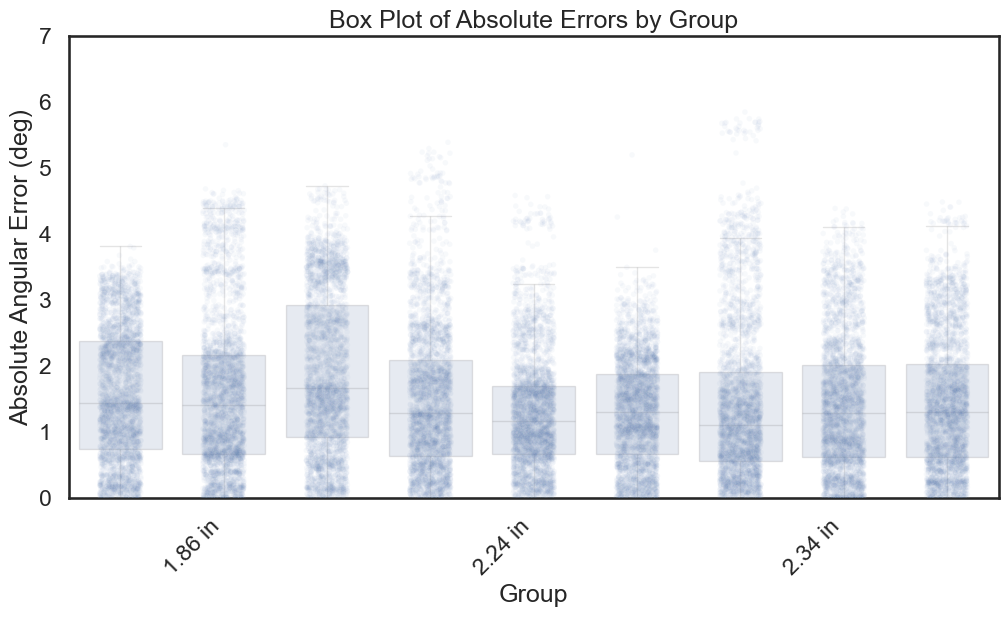

In [11]:
error_data_dict = {}  # Dictionary for box plot: {sample_name: error_values}
group_dict = {}  # Dictionary to map samples to groups

for i, group in enumerate(DS_all):  # Loop over groups
    for j, datafiles in enumerate(group):  # Loop over datasets in each group
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_bw_01()
        g.train_model_test_accuracy(degree=degree)
        
        # Use cross_validation_angular_error to get error data
        mean_error, std_error, predictions_df = g.cross_validation_angular_error(degree=degree)

        if not isinstance(predictions_df, pd.DataFrame):
            raise TypeError(f"Expected cross_validation_angular_error to return a DataFrame, got {type(predictions_df)}")

        # Ensure the DataFrame contains the 'Absolute Error' column
        if "Absolute Error" not in predictions_df.columns:
            raise ValueError(f"Dataset from {datafiles} does not contain 'Absolute Error' column")

        # Assign unique sample names and store error values
        sample_name = f"Group{i+1}_Sample{j+1}"  
        error_data_dict[sample_name] = predictions_df['Absolute Error'].tolist()
        group_dict[sample_name] = bar_labels[i]  # Assign to group

    
g.plot_box_plot(error_data_dict, group_dict, bar_colors, bar_labels,  box_alpha=0.15, data_alpha=0.04, jitter=0.2)

Pairwise plots 1F

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_misalignment_v20_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_misalignment_v10_2nd_attempt_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain

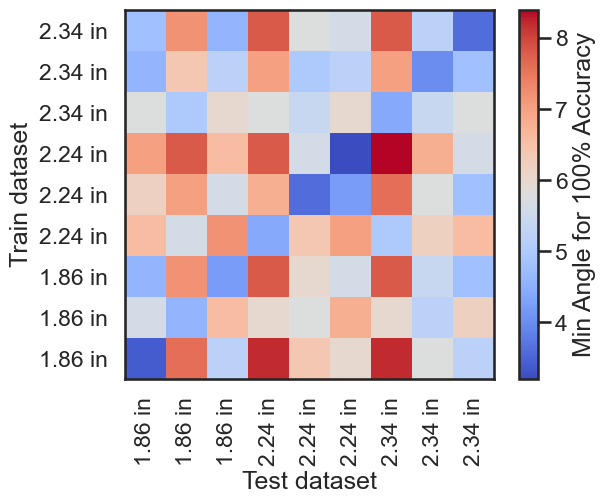

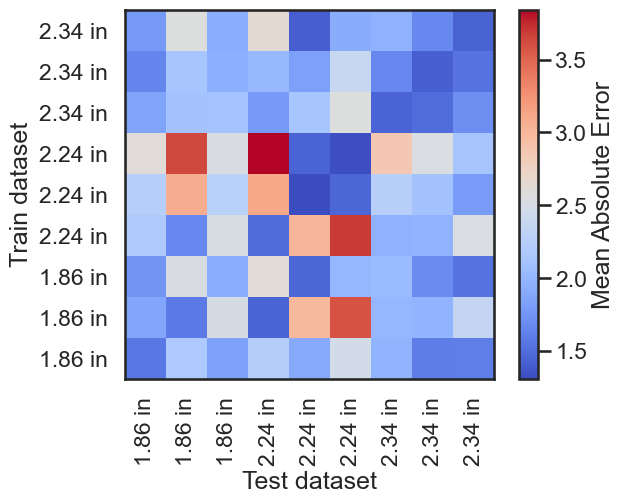

In [13]:
# Initialize results list
DS_flat = []; xlabel_flat = []
for _, (ds_group, ds_lab) in enumerate(zip(DS_all, bar_labels)):
    xlabel_flat.extend([ds_lab]*len(ds_group))
    DS_flat.extend(ds_group)

pairwise_min_accuracy = np.zeros((len(DS_flat), len(DS_flat))) + np.nan
pairwise_abs_error = np.zeros((len(DS_flat), len(DS_flat))) + np.nan

# Iterate over each dataset as the training dataset
for i, train_datafiles in enumerate(DS_flat):
    train_name = 'DS'+str(i+1)
    
    g = bender_class()
    g.load_data(train_datafiles)
    g.normalize_adc_bw_01()

    # Train the model before testing (for off-diagonal cases)
    # This is a model fit on training data (make this as high as possible)
    # Just need 1 iteration to get the model
    g.train_model_test_accuracy(perc_train = 0.99, niter=1, degree=degree)


    for j, test_datafiles in enumerate(DS_flat):
        
        # Diagonal Case (Within-Sample Testing)
        if i == j:
            # Make a new bender class with new model (fit on 80%, test on 20% x 10 times)
            g2 = bender_class()
            g2.load_data(train_datafiles)
            g2.normalize_adc_bw_01()

            # Do typical train on 80%, test on 20% x 10 times 
            g2.train_model_test_accuracy(perc_train = 0.8, niter=10, degree=2)
            min_angle_100, all_min_angle_100 = g.get_min_accuracy_100()
            pairwise_min_accuracy[i, j] = np.mean(np.array(all_min_angle_100))
            pairwise_abs_error[i, j] = np.mean(np.hstack((g2.abs_angular_error)))
        # Off-Diagonal Case (Cross-Sample Testing)
        else:

            # Load test dataset separately
            g_test = bender_class()
            g_test.load_data(test_datafiles)  
            g_test.normalize_adc_bw_01()
            df_test = g_test.data

            # Run multiple accuracy tests
            acc = []; error = []
            for _ in range(10): 
                accuracy, abs_error = g.predict_new_data(train_test_split(df_test, test_size=0.2, shuffle=True, random_state=42)[1])
                acc.append(accuracy)
                error.append(abs_error)

            # Compute Min Angle for Accuracy 100%
            min_angle_100, all_min_angle_100 = g.get_min_accuracy_100(accuracy_matrix=np.vstack(acc)) or (np.nan, None)
            pairwise_min_accuracy[i, j] = np.mean(np.array(all_min_angle_100))

            mean_error = np.mean(np.hstack((error)))
            pairwise_abs_error[i, j] = mean_error

for _, (data, title) in enumerate(zip([pairwise_min_accuracy, pairwise_abs_error], 
                                      ['Min Angle for 100% Accuracy', 'Mean Absolute Error'])):
    f, ax = plt.subplots()
    plt.pcolormesh(data, cmap='coolwarm', vmin=np.nanmin(data), vmax=np.nanmax(data))
    plt.xticks(np.arange(len(DS_flat))+0.5, xlabel_flat, rotation=90)
    plt.xlabel('Test dataset')
    plt.yticks(np.arange(len(DS_flat))+0.5, xlabel_flat)
    plt.ylabel('Train dataset')
    plt.axis('square')
    plt.colorbar(label=title)


In [15]:
#g.plot_compact_pairwise_comparison(pairwise_min_accuracy, pairwise_abs_error, xlabel_flat, ylim=(0, 8))

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_misalignment_v20_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_misalignment_v10_2nd_attempt_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_17_25/2.24_misalignment_v10_4_17_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub

C:\Users\toppe\AppData\Local\Temp\ipykernel_10752\442164949.py:310: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


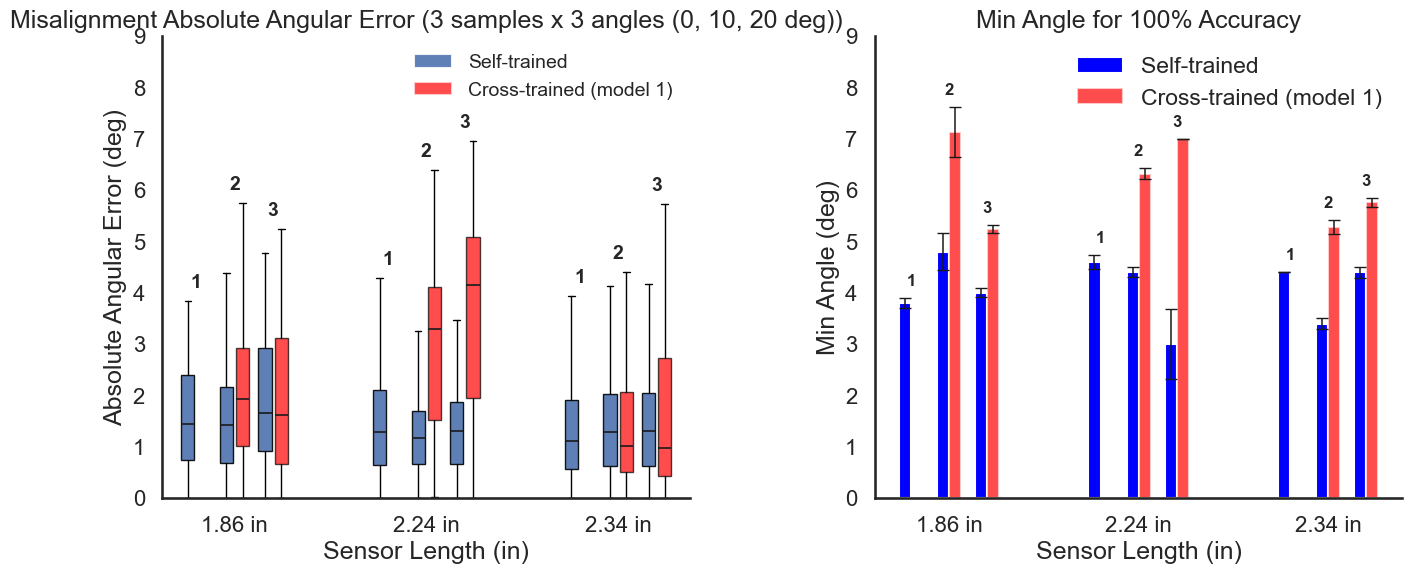

In [21]:
# --- imports ---
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# =============== USER DATA: MISALIGNMENT SETS ===============
# 1.86 group
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/4_22_25/1.86_static_v1_4_22_25.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/4_22_25/1.86_misalignment_v20_4_22_25.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/4_22_25/1.86_misalignment_v10_2nd_attempt_4_22_25.csv")

# 2.24 group
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv")
DS5_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_misalignment_v10_4_17_25.csv")
DS6_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_misalignment_v20_4_17_25.csv")

# 2.34 group
DS7_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.34_static_v1_4_18_25.csv")
DS8_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.34_misalignment_v10_4_18_25.csv")
DS9_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.34_misalignment_v20_4_18_25.csv")

DS_all = [
    [DS1_datafiles, DS2_datafiles, DS3_datafiles],
    [DS4_datafiles, DS5_datafiles, DS6_datafiles],
    [DS7_datafiles, DS8_datafiles, DS9_datafiles],
]

bar_labels  = ["1.86 in", "2.24 in", "2.34 in"]
bar_colors  = ["b"] * len(bar_labels)   # used for left-plot self boxes
degree      = degree                     # reuse your degree (assumed already defined)

# ---- style knobs ----
TITLE_FONTSIZE = 18
LABEL_FONTSIZE = 18
XTICK_FONTSIZE = 16
YTICK_FONTSIZE = 16
WHISKER_INDEX_FONTSIZE = 14
WHISKER_INDEX_WEIGHT = 'bold'

# =============== 1) LEFT DATA: self abs-errors + self min-angle dists ===============
group_errors = []              # per-group list of per-sample abs-error arrays (self)
sample_labels_by_group = []    # per-group base filenames
ma100_self_list = []           # per-group list of per-sample arrays (min-angle 100% dists)

for group in DS_all:
    group_errs = []
    group_sample_labels = []
    group_ma100 = []

    for datafiles in group:
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_bw_01()               # keep normalization consistent
        g.train_model_test_accuracy(degree=degree)

        mean_error, std_error, predictions_df = g.cross_validation_angular_error(degree=degree)
        if not isinstance(predictions_df, pd.DataFrame):
            raise TypeError("cross_validation_angular_error must return a DataFrame")
        if "Absolute Error" not in predictions_df.columns:
            raise ValueError(f"{os.path.basename(datafiles)} missing 'Absolute Error' column")

        errs = predictions_df["Absolute Error"].dropna().tolist()
        group_errs.append(errs)

        # self min-angle distribution (for right plot error bars)
        _, ma100 = g.get_min_accuracy_100()
        group_ma100.append(np.asarray(ma100).ravel())

        group_sample_labels.append(os.path.splitext(os.path.basename(datafiles))[0])

    group_errors.append(group_errs)
    sample_labels_by_group.append(group_sample_labels)
    ma100_self_list.append(group_ma100)

# =============== 2) CROSS DATA: model-1 cross abs-errors + min-angle dists =========
group_cross_errors = []   # per-group list of per-sample abs-error arrays (cross)
ma100_cross_list  = []    # per-group list of per-sample arrays (min-angle cross); first sample empty

for group in DS_all:
    # train model on the FIRST sample of this group
    g_m1 = bender_class()
    g_m1.load_data(group[0])
    g_m1.normalize_adc_bw_01()
    g_m1.train_model_test_accuracy(perc_train=0.99, niter=1, degree=degree)

    group_cross = []
    group_cross_ma100 = []

    for i_s, test_file in enumerate(group):
        g_test = bender_class()
        g_test.load_data(test_file)
        g_test.normalize_adc_bw_01()
        df_test = g_test.data

        acc_runs = []
        abs_errs = []
        # vary random_state to capture variability
        for rs in range(10):
            _, X_test = train_test_split(df_test, test_size=0.2, shuffle=True, random_state=rs)
            acc, abs_error = g_m1.predict_new_data(X_test)
            acc_runs.append(np.asarray(acc))
            abs_errs.extend(np.asarray(abs_error).ravel())

        group_cross.append(abs_errs)

        # cross min-angle distribution from accuracy runs
        _, ma100_cross = g_m1.get_min_accuracy_100(
            accuracy_matrix=np.vstack(acc_runs)
        ) or (np.nan, [])
        group_cross_ma100.append(np.asarray(ma100_cross).ravel())

    group_cross_errors.append(group_cross)
    ma100_cross_list.append(group_cross_ma100)

# =============== 3) PAIRWISE MATRICES (means for right bars) =======================
# If you already computed these earlier in your session, you can skip this block.
# Build flat list for pairwise evaluation
DS_flat = [df for grp in DS_all for df in grp]
xlabel_flat = []
for lbl, grp in zip(bar_labels, DS_all):
    xlabel_flat.extend([f"{lbl} #{i+1}" for i in range(len(grp))])

N = len(DS_flat)
pairwise_min_accuracy = np.full((N, N), np.nan, dtype=float)
pairwise_abs_error    = np.full((N, N), np.nan, dtype=float)

# train one model per row i
for i, train_datafiles in enumerate(DS_flat):
    g_tr = bender_class()
    g_tr.load_data(train_datafiles)
    g_tr.normalize_adc_bw_01()
    g_tr.train_model_test_accuracy(perc_train=0.99, niter=1, degree=degree)

    for j, test_datafiles in enumerate(DS_flat):
        if i == j:
            # within-sample accuracy distribution (10 runs)
            g2 = bender_class()
            g2.load_data(train_datafiles)
            g2.normalize_adc_bw_01()
            g2.train_model_test_accuracy(perc_train=0.8, niter=10, degree=degree)
            # min-angle distribution (self)
            min_angle_100, all_min_angle_100 = g_tr.get_min_accuracy_100()
            pairwise_min_accuracy[i, j] = np.nanmean(np.asarray(all_min_angle_100))
            # mean absolute error (self)
            pairwise_abs_error[i, j] = np.nanmean(np.hstack(g2.abs_angular_error))
        else:
            # cross: evaluate i’s model on j’s data, 10 splits
            g_te = bender_class()
            g_te.load_data(test_datafiles)
            g_te.normalize_adc_bw_01()
            df_test = g_te.data

            acc_runs = []
            errs = []
            for rs in range(10):
                _, X_test = train_test_split(df_test, test_size=0.2, shuffle=True, random_state=rs)
                acc, abs_error = g_tr.predict_new_data(X_test)
                acc_runs.append(np.asarray(acc))
                errs.extend(np.asarray(abs_error).ravel())
            # min angle for 100%
            _, all_min_angle_100 = g_tr.get_min_accuracy_100(accuracy_matrix=np.vstack(acc_runs)) or (np.nan, [])
            pairwise_min_accuracy[i, j] = np.nanmean(np.asarray(all_min_angle_100))
            pairwise_abs_error[i, j]    = np.nanmean(np.asarray(errs))

# =============== 4) LEFT POSITIONS & COLORS (same spacing as earlier) ==============
box_width           = 0.26
paired_offset       = 0.32   # blue & red sit close without overlap
intra_group_spacing = 0.76   # gap between samples
gap_between_groups  = 1.50   # bigger gap between groups

positions        = []   # sample centers (for labels)
positions_self   = []   # x for blue
positions_cross  = []   # x for red
colors_for_boxes = []
xticks_group     = []   # center per group (for 3 ticks)

if len(bar_colors) != len(bar_labels):
    bar_colors = ["b"] * len(bar_labels)

x_cursor = 1.0
for gi, (group_errs, lbl) in enumerate(zip(group_errors, bar_labels)):
    n = len(group_errs)
    centers = list(x_cursor + np.arange(n) * intra_group_spacing)
    positions.extend(centers)
    xticks_group.append(np.mean(centers))

    positions_self.extend([x - paired_offset/2 for x in centers])
    positions_cross.extend([x + paired_offset/2 for x in centers])

    colors_for_boxes.extend([bar_colors[gi]] * n)
    x_cursor = centers[-1] + gap_between_groups + intra_group_spacing

flat_errs_self = [errs for grp in group_errors for errs in grp]

# Cross for LEFT: skip first sample in each group
flat_errs_cross_filtered = []
positions_cross_filtered = []
cross_sample_mask = []

sample_idx = 0
for gi, grp in enumerate(DS_all):
    for i in range(len(grp)):
        has_cross = (i != 0)
        cross_sample_mask.append(has_cross)
        if has_cross:
            flat_errs_cross_filtered.append(group_cross_errors[gi][i])
            positions_cross_filtered.append(positions_cross[sample_idx])
        sample_idx += 1

# =============== 5) PLOT: LEFT boxplots + RIGHT via class method ===================
fig, (axL, axR) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={"wspace": 0.35})

# ---- LEFT: paired boxplots (self vs cross) ----
bp_self = axL.boxplot(
    flat_errs_self, positions=positions_self, widths=box_width,
    patch_artist=True, showfliers=False,
    medianprops={"color":"k","linewidth":1.2}
)
bp_cross = axL.boxplot(
    flat_errs_cross_filtered, positions=positions_cross_filtered, widths=box_width,
    patch_artist=True, showfliers=False,
    medianprops={"color":"k","linewidth":1.2}
)

# Color boxes
for patch, c in zip(bp_self['boxes'], colors_for_boxes):
    patch.set_facecolor(c); patch.set_alpha(0.9)
for patch in bp_cross['boxes']:
    patch.set_facecolor('red'); patch.set_alpha(0.7)

# Group ticks + axis labels
axL.set_xticks(xticks_group)
axL.set_xticklabels(bar_labels, fontsize=XTICK_FONTSIZE)
axL.set_xlabel("Sensor Length (in)", fontsize=LABEL_FONTSIZE)
axL.set_ylabel("Absolute Angular Error (deg)", fontsize=LABEL_FONTSIZE)
axL.set_title("Misalignment Absolute Angular Error (3 samples x 3 angles (0, 10, 20 deg))", fontsize=TITLE_FONTSIZE)

# Style: ticks and spines
axL.tick_params(axis='x', labelsize=XTICK_FONTSIZE)
axL.tick_params(axis='y', labelsize=YTICK_FONTSIZE)
axL.spines['top'].set_visible(False)
axL.spines['right'].set_visible(False)
axL.grid(False)
axL.set_ylim(0, 9)   # your chosen left y-limit

# Sample numbers above each sample center
sample_indices = [str(i+1) for grp in sample_labels_by_group for i in range(len(grp))]
ymin, ymax = axL.get_ylim()
y_pad = 0.02 * (ymax - ymin)
max_needed_y, cross_wi = ymax, 0
for k, xc in enumerate(positions):
    wsl, wsh = bp_self['whiskers'][2*k], bp_self['whiskers'][2*k+1]
    y_top = max(np.max(wsl.get_ydata()), np.max(wsh.get_ydata()))
    if cross_sample_mask[k]:
        wcl, wch = bp_cross['whiskers'][2*cross_wi], bp_cross['whiskers'][2*cross_wi+1]
        y_top = max(y_top, np.max(wcl.get_ydata()), np.max(wch.get_ydata()))
        cross_wi += 1
    axL.text(xc, y_top + y_pad, sample_indices[k], ha='center', va='bottom',
             fontsize=WHISKER_INDEX_FONTSIZE, fontweight=WHISKER_INDEX_WEIGHT, clip_on=False)
    max_needed_y = max(max_needed_y, y_top + y_pad)
if max_needed_y > ymax:
    axL.set_ylim(ymin, max_needed_y + 0.02 * (max_needed_y - ymin))

# Legend without box
from matplotlib.patches import Patch
axL.legend(
    handles=[
        Patch(facecolor=colors_for_boxes[0] if colors_for_boxes else 'C0', alpha=0.9, label='Self-trained'),
        Patch(facecolor='red', alpha=0.7, label='Cross-trained (model 1)'),
    ],
    frameon=False, fontsize=WHISKER_INDEX_FONTSIZE, loc='upper right'
)

# ---- RIGHT: use your class method to draw into axR with paired bars ----
g_for_plot = bender_class()  # any instance is fine; method uses provided arrays

# Build xlabel_flat to match matrices order
xlabel_flat = []
for lbl, group in zip(bar_labels, DS_all):
    xlabel_flat.extend([f"{lbl} #{i+1}" for i in range(len(group))])

g_for_plot.plot_compact_pairwise_comparison(
    pairwise_min_accuracy=pairwise_min_accuracy,
    pairwise_abs_error=pairwise_abs_error,
    xlabel_flat=xlabel_flat,
    group_size=len(DS_all[0]),
    title1='Min Angle for 100% Accuracy',
    title2='Mean Absolute Error',     # ignored when ax_top is provided
    ylim=(0, 9),                      # right y-limit
    self_minangle_dists=ma100_self_list,
    cross_minangle_dists=ma100_cross_list,
    err_metric='sd',
    capsize=4,
    ax_top=axR,                       # draw into RIGHT axes
    x_sample_centers=positions,       # align with LEFT spacing
    group_centers=xticks_group,       # only 3 ticks
    group_labels=bar_labels,          # "1.86 in", "2.24 in", "2.34 in"
    bar_w=0.24,
    paired=True,
    show_sample_numbers=True
)

# Right style to match left
axR.set_xlabel("Sensor Length (in)", fontsize=LABEL_FONTSIZE)
axR.tick_params(axis='x', labelsize=XTICK_FONTSIZE)
axR.tick_params(axis='y', labelsize=YTICK_FONTSIZE)
axR.grid(False)
axR.spines['top'].set_visible(False)
axR.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("misalignment_left_boxplots_and_right_pairwise.png", dpi=300, bbox_inches='tight')
plt.show()
